Saved features to: features_index_finger.csv


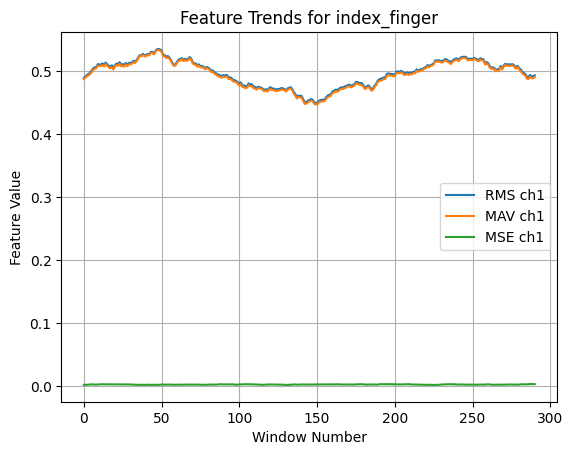

Saved features to: features_okay.csv


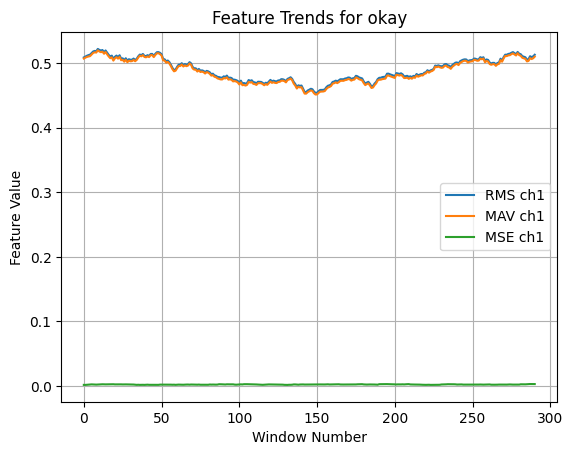

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def normalize_signal(data):
    normalize = data / 1023
    return normalize

def segmentation_signal(data):
    window_size = 100
    step_size = 10
    windows = []
    start = 0
    while start + window_size <= len(data):
        end = start + window_size
        window = data[start:end]
        windows.append(window)
        start += step_size
    return windows

def extract_features(windows_ch1, windows_ch2):
    features = []
    for i in range(len(windows_ch1)):
        ch1 = windows_ch1[i]
        ch2 = windows_ch2[i]
        rms_ch1 = np.sqrt(np.mean(ch1**2))
        rms_ch2 = np.sqrt(np.mean(ch2**2))
        mav_ch1 = np.mean(np.abs(ch1))
        mav_ch2 = np.mean(np.abs(ch2))
        mse_ch1 = np.mean((ch1 - np.mean(ch1))**2)
        mse_ch2 = np.mean((ch2 - np.mean(ch2))**2)
        feature_row = {
            'rms_ch1': rms_ch1,
            'rms_ch2': rms_ch2,
            'mav_ch1': mav_ch1,
            'mav_ch2': mav_ch2,
            'mse_ch1': mse_ch1,
            'mse_ch2': mse_ch2
        }
        features.append(feature_row)
    return features

def process_emg_file(file_path, label, output_csv):
    df = pd.read_csv(file_path)
    df['ch1'] = normalize_signal(df['ch1'])
    df['ch2'] = normalize_signal(df['ch2'])
    ch1_windows = segmentation_signal(df['ch1'].values)
    ch2_windows = segmentation_signal(df['ch2'].values)
    features = extract_features(ch1_windows, ch2_windows)
    for row in features:
        row['label'] = label
    features_df = pd.DataFrame(features)
    features_df.to_csv(output_csv, index=False)
    print(f"Saved features to: {output_csv}")
    plt.figure()
    plt.plot(features_df['rms_ch1'], label='RMS ch1')
    plt.plot(features_df['mav_ch1'], label='MAV ch1')
    plt.plot(features_df['mse_ch1'], label='MSE ch1')
    plt.title(f"Feature Trends for {label}")
    plt.xlabel("Window Number")
    plt.ylabel("Feature Value")
    plt.legend()
    plt.grid(True)
    plt.show()

process_emg_file("index_finger_data.csv", "index_finger", "features_index_finger.csv")
process_emg_file("okay_data.csv", "okay", "features_okay.csv")